# Finding Two Best Markets for the Product Advertisement

## 1. Introduction

We work for an e-learning company that offers programming courses. The courses offered are:-

 - Main Courses
    * Web and Mobile development
 - Other Courses
    * Data Science
    * Game Development
    
**For the promotion of the product we would like to invest some money in an advertisement. `Finding the two best markets for our product to advertise in` is the main objective of our project.**
 

## 2. Exploring the Data

The best way of achieving our objective is by organizing surveys for a couple of different markets to find out which would be the best choice for advertising. This is expensive. It is always in the best interest to explore the cheaper options first. 

__[freeCodeCamp](https://www.freecodecamp.org/)__ is a free e-learning platform that offers courses on *web development*. They run a popular *Medium* publication with huge number of followers. They conducted a survey in 2017 __[New Coder Survey](https://github.com/freeCodeCamp/2017-new-coder-survey)__ (The given link has the dataset). Their survey attracted new coders with diverse interests. To begin with we will explore this dataset for the purpose of our analysis.

In [1]:
#import the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#open the file using pandas dataframe and go through few rows
Coder_Survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
Coder_Survey.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#check the number of rows and columns
Coder_Survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [4]:
#look at the column names
Coder_Survey.columns.values

array(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber',
       'CityPopulation', 'CodeEventConferences', 'CodeEventDjangoGirls',
       'CodeEventFCC', 'CodeEventGameJam', 'CodeEventGirlDev',
       'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool',
       'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge',
       'CodeEventRailsGirls', 'CodeEventStartUpWknd',
       'CodeEventWkdBootcamps', 'CodeEventWomenCode',
       'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen',
       'CountryLive', 'EmploymentField', 'EmploymentFieldOther',
       'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning',
       'FinanciallySupporting', 'FirstDevJob', 'Gender', 'GenderOther',
       'HasChildren', 'HasDebt', 'HasFinancialDependents',
       'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary',
       'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x',
       'ID.y',

From the above examination of the dataframe, we make the following observations.

 * There are *18175* number of rows and *136* number of columns. 

 * *Relevant columns for the purpose of analysis:-*
   * Age
   * CityPopulation
   * CountryLive
   * EmploymentField
   * JobRoleInterest

## 3. Checking for Sample Representativity

Before we begin our analysis with *where the new coders are located*, and *how much money they are willing to spend*, we want to estimate wether the data represents the right categories of people. i.e. if the job interest of people match with the courses we teach.

To clarify our doubt we will explore the *JobRoleInterest* column in the dataset. We will generate a *frequency distribution (in percentages)* table.

In [5]:
Job_Role_Int = Coder_Survey['JobRoleInterest'].value_counts(normalize=True)*100
per_freq_dist = pd.DataFrame(Job_Role_Int)
per_freq_dist = per_freq_dist.rename(columns={'JobRoleInterest':'Percentage'})
per_freq_dist

,Percentage
Full-Stack Web Developer,11.770595
Front-End Web Developer,6.435927
Data Scientist,2.173913
Back-End Web Developer,2.030892
Mobile Developer,1.673341
Game Developer,1.630435
Information Security,1.315789
"Full-Stack Web Developer, Front-End Web Developer",0.915332
"Front-End Web Developer, Full-Stack Web Developer",0.800915
Product Manager,0.786613


Frequency distribution table has *3213* rows. Looking at the table we make following observations:-

 - Top five job roles among new coders are:-
     1. *Full-Stack Web Developer* (~ 11.7%)
     2. *Front-End Web Developer* (~ 6.4%)
     3. *Data Scientist* (~ 2.1%)
     4. *Back-End Web Developer* (~ 2%)
     5. *Mobile Developer* (~ 1.6%)
 - People are also interested in more than one subject. (Eg. Designer & Developer, Data Scientist & Data Engineer etc.)
 
 Below we will try understanding the frequency distribution better by visualizing it for the top ten job interests. 

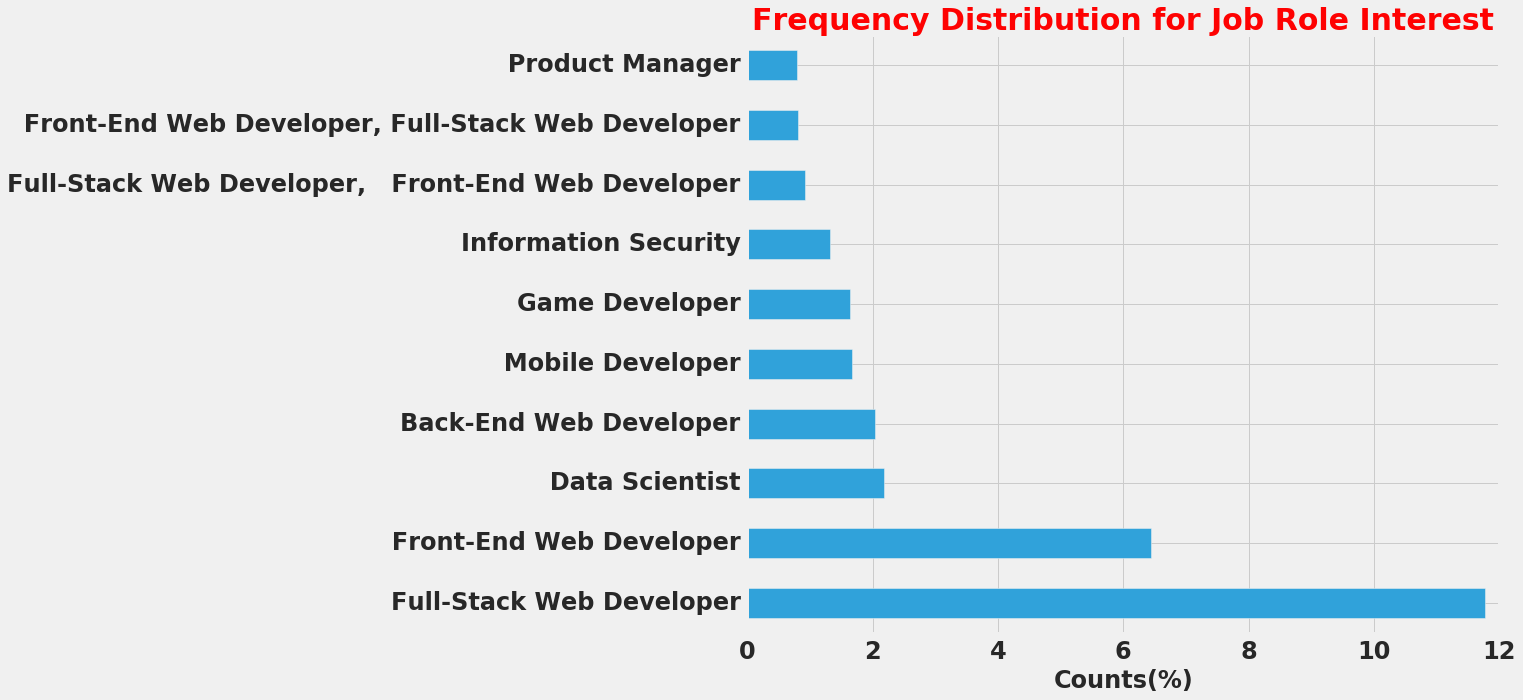

In [6]:
plt.style.use('fivethirtyeight')
per_freq_dist.head(10).plot.barh(figsize=(12,10), legend="")
plt.title('Frequency Distribution for Job Role Interest', size=30, color='red', weight='bold')
plt.yticks(size=24, weight='bold')
plt.xticks(size=24, weight='bold')
plt.xlabel('Counts(%)', size=24, weight='bold')

Our analysis led to the perception that *there is a considerable percentage of new coders who are interested in Web and Mobile Development*. 

## 4. New Coders - Locations and Densities

Since we have a sample with right categories of people,we can start analyzing it. Our goal in here is to find out 
 1. Where these new coders are located in?
 2. What are the densities of new coders in each of these locations?
 
 For this purpose we will explore the column *CountryLive* (what country each participant lives in). From the list we can understand the top countries the new coders reside-in.  

First let us drop all the rows where the participants did not answer *what role they are interested in*. And assign it back to the original dataframe.

In [7]:
Coder_Survey = Coder_Survey.dropna(subset=["JobRoleInterest"])
Coder_Survey = Coder_Survey.reset_index(drop=True)
Coder_Survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992 entries, 0 to 6991
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 7.3+ MB


Now we are left with *6992* rows. One third of actual dataset. 

Further, we will explore the *CountryLive* column. We will generate both *Absolute Frequency* and *Relative Frequency (in percentages)* for the column.

In [8]:
#Calculation of absolute frequency
Absolute_Freq = Coder_Survey["CountryLive"].value_counts()
Absolute_Freq.head()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Name: CountryLive, dtype: int64

In [9]:
#Calculation of relative frequency in percentages
Relative_Freq = Coder_Survey["CountryLive"].value_counts(normalize=True)*100
Relative_Freq.head()

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Name: CountryLive, dtype: float64

We listed top five countries where new coders are located in.

 * The top country is *United States* with more than *45%* of new coders located in. 
 * The second in the list is *India* with *~ 7.7%* of new coders located in. 
 * *United Kingdom* has *~ 4.6%* of new coders.
 * *Canada* has *~ 3.8%* of new coders.
 * *Poland* has *~ 1.9%* new coders.
 
 Among the countries above we will only consider top four English speaking countries as our course is designed in English.
 
 We can further explore *how much money* the new coders are willing to spend on learning. 

## 5. Spending Money for Learning

In this section we will analyse how much money, the new coders are willing to spend on learning. Advertising in a market where people are willing to learn for free is not profitable for the company. 

In the dataset *MoneyForLearning* column describes the amount of money spent by participants from the moment they started coding until the completion of the survey in *American Dollars*. *MonthsProgramming* column describes the how many months each participants took until the completon of the survey. 

We want to find out how much money each student spends per month. So we will create a new column called *AmontofMoneySpent*, for which we will divide the *MoneyForLearning* column by *MonthsProgramming* column.

Some students have mentioned that they had been learning for *0* months meaning they had just started learning. To avoid dividing by 0, we will replace *0* with *1*. 

In [10]:
Coder_Survey["MonthsProgramming"] = Coder_Survey["MonthsProgramming"].replace(0.0, 1.0)
Coder_Survey["AmountofMoneySpent"] = round(Coder_Survey["MoneyForLearning"] / Coder_Survey["MonthsProgramming"], 2)
Coder_Survey["AmountofMoneySpent"].head()

0     13.33
1    200.00
2      0.00
3      0.00
4      0.00
Name: AmountofMoneySpent, dtype: float64

We successfully created the new column *AmountofMoneySpent*. Let us count the number of *Null* values in the same column.

In [11]:
null_count = Coder_Survey["AmountofMoneySpent"].isna().sum()
null_count

675

There are *675* *Null* values in the column. Let us get rid of all the *Null* values in columns *AmountofMoneySpent* and *CountryLive*. 

In [12]:
Coder_Survey["AmountofMoneySpent"] = Coder_Survey["AmountofMoneySpent"].dropna()
Coder_Survey["CountryLive"] = Coder_Survey["CountryLive"].dropna()

Our main objective in this section is to find out how much money each participant is willing to pay. In the last section we analysed what are the top best countries to market our product in. Among these countries, we will consider top *4* *English* speaking countries as our courses are written in *English*. 

In here we will calculate how much money participants are willing to pay on an average in each of the following countries.

 1. United States of America
 2. India
 3. United Kingdom
 4. Canada

In [13]:
country = ["United States of America", "India", "United Kingdom", "Canada"]
country_bool = Coder_Survey.loc[Coder_Survey["CountryLive"].isin(country)]
country_bool

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,AmountofMoneySpent
0,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.33
1,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.00
4,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
7,44.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,27.0,1.0,1.0,0.0,Code Fellows,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
10,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.67
11,46.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.71
12,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.86
13,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00


In [14]:
country_bool.pivot_table(values='AmountofMoneySpent', index='CountryLive', aggfunc=[np.mean,np.median,pd.Series.mode])

,mean,median,mode
,AmountofMoneySpent,AmountofMoneySpent,AmountofMoneySpent
CountryLive,,,
Canada,113.510958,0.00,0.0
India,135.101102,0.00,0.0
United Kingdom,45.534337,0.00,0.0
United States of America,227.998023,3.33,0.0


Above table summarises the *Average Money Spent* by the paricipants among the top four countries. We calculated *Mean*, *Median* and *Mode* for all these countries. Among these metrics, only *mean* gives valid values for each of these countries. 

From the above table we make following observations:-

 * The highest money is spent by participants in *United States of America* i.e. *~ \$ 228*. Second highest is by Indian participants i.e. *~ \$ 135*. The third highest is by Canadian partcicipants i.e. *~ \$ 114* and fourth is by participants from *United Kingdom*, i.e. *~ \$ 46*. 
 
 * Eventhough socio-economical metrics are higher for United Kingdom and Canada compared to India, average value spent by participants is relatively higher for India than the other two. 

 * We observe that frequency distribution for *United Kingdom* is higher than *Canada*, the average money spent by participants in *Canada* is more than double the money spent by participants in *United Kingdom*.  
 
 * Our company sells the subscription at price *\$ 59 per month*. Except *United Kingdom* other three countries' paricipants are willing to pay well above the subscription rate.  

## 6. Dealing with Extreme Outliers

As we have noted in the earlier section, the mean value for UK and Canada are relatively low compared to India. This can be due to some outliers. Let us generate a boxplot for all the four countries, look at the distribution of money spent by the participants and spot the outliers. 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

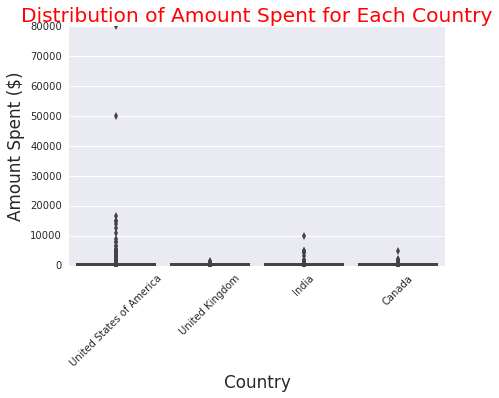

In [15]:
sns.set_style('darkgrid')
sns.boxplot(x='CountryLive', y='AmountofMoneySpent', data = country_bool)
plt.title('Distribution of Amount Spent for Each Country', color='red')
plt.xlabel('Country')
plt.ylabel('Amount Spent ($)')
plt.xticks(rotation=45)

As we can see on the above graph for USA, values above *20000* can be considered as extreme outliers. But if we look at countries other than USA, possible outliers are even below 10000. Let us generate a similar box-plot with setting the y-axis limit to 10000.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



(0, 10000)

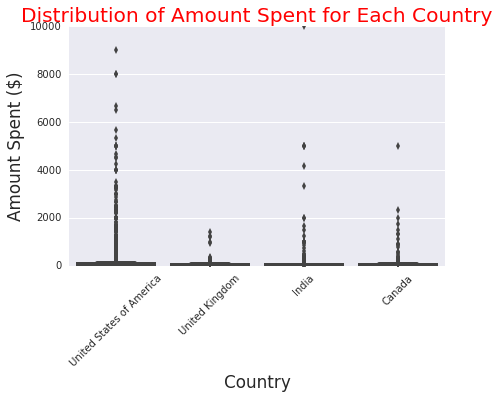

In [16]:
sns.set_style('darkgrid')
sns.boxplot(x='CountryLive', y='AmountofMoneySpent', data = country_bool)
plt.title('Distribution of Amount Spent for Each Country',color='red')
plt.xlabel('Country')
plt.ylabel('Amount Spent ($)')
plt.xticks(rotation=45)
plt.ylim(0, 10000)

From the above graph, we deduce that for USA values above *6000* can be considerd as eccentric. For *India*, *UK*, and *Canada* we can consider values above *3000* as outliers. Let us modify the dataframe with the above mentioned values for different countries in the *AmountofMoneySpent* column.

In [17]:
# using boolean filtering we seggregate country specific datasets and using merge function we combine the datasets
country_bool_USA = country_bool[(country_bool["AmountofMoneySpent"] < 6000) & (country_bool["CountryLive"]=="United States of America")]
country_bool_India = country_bool[(country_bool["AmountofMoneySpent"] < 3000) & (country_bool["CountryLive"]=="India")]
country_bool_Canada = country_bool[(country_bool["AmountofMoneySpent"] < 3000) & (country_bool["CountryLive"]=="Canada")]
country_bool_UK = country_bool[(country_bool["AmountofMoneySpent"] < 3000) & (country_bool["CountryLive"]=="United Kingdom")]
country_bool_1 = pd.merge(country_bool_USA, country_bool_India, how='outer')
country_bool_2 = pd.merge(country_bool_1, country_bool_Canada, how='outer')
country_bool_3 = pd.merge(country_bool_2, country_bool_UK, how='outer')
country_bool_3

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,AmountofMoneySpent
0,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.33
1,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.00
2,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.67
4,46.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.71
5,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.86
6,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
7,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,100.00
8,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.42
9,29.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.67


Additionally, we will calculate the mean value for the amount spent by the participants for each country.

In [18]:
country_bool_3.pivot_table(values='AmountofMoneySpent', index='CountryLive', aggfunc=[np.mean])

,mean
,AmountofMoneySpent
CountryLive,
Canada,93.065397
India,65.758884
United Kingdom,45.534337
United States of America,142.654634


From the above table we make following observations :- 

* With highest mean value of *~\$ 142* USA tops the list.
* The second best country in terms of average spending capacity for the participants is *Canada* with *~\$ 93*.
* Third is India with *~\$ 65* per participant.
* Last in the list is UK with *~\$ 45* per participant.

## 7. Choosing the Two Best Markets

Looking at our analysis we are certain that one of two best markets for our analysis is **United States of America**. We have determined that *there is a considerable number of new coders living who are willing to pay a decent amount of fees each month*. 

We need to decide on which is the second best market to advertise in? 

When it comes to highest number of new coders, *India* with *~ 7.7%* is ahead of *Canada*, which has *~ 3.8%* new coders. When it comes to the spending capacity of participants *Canada* is ahead with *~\$ 93* and *India* is behind with *~\$ 65*. 

Let us look at some other specifications in order to decide on which is the second best market for advertisement. 

First let us look at the gender column and calculate the relative frequencies for the different genders. We will also calculate the *average spending value* for the genders.  

Below we calculate the needful for *India*.

In [19]:
country_bool_India["Gender"].value_counts(normalize=True)*100

male      89.89011
female    10.10989
Name: Gender, dtype: float64

In [20]:
country_bool_India.pivot_table(values="AmountofMoneySpent",index='Gender', aggfunc='mean')

,AmountofMoneySpent
Gender,
female,35.470652
male,69.242445


From the above analysis, we found out that in India, *~ 90%* of new coders are *males* and the *average spending value* for them is *~\$ 69*, that is well above our subscription fees. Only *~ 10\%* of the new coders are *females*, and their *average spending capacity* is way below our subscription fees. 

Below we calculate the same for *Canada*.

In [21]:
country_bool_Canada["Gender"].value_counts(normalize=True)*100

male           74.789916
female         23.949580
genderqueer     0.420168
trans           0.420168
agender         0.420168
Name: Gender, dtype: float64

In [22]:
country_bool_Canada.pivot_table(values="AmountofMoneySpent",index='Gender', aggfunc='mean')

,AmountofMoneySpent
Gender,
agender,0.000000
female,152.252281
genderqueer,0.000000
male,74.643090
trans,27.780000


In *Canada*, there are *~ 75%* of *male* new coders and *~ 24%* of *female* new coders. The spending capacity of *female new coders* are *~\$ 152* which is double that of *male new coders* i.e. *~\$ 75*. Only *1%* of new coders who are *Other Genders* cannot afford to pay the fees.

**This implies that *99%* of the new coders can afford the subscription amount in Canada, whereas this percentage is *90%* for India.**

Further, We will consider the *average age* for each country and based on the result try assessing which is the best country.  

In [23]:
country_bool.pivot_table(values='Age', index='CountryLive', aggfunc=[np.mean])

,mean
,Age
CountryLive,
Canada,26.868217
India,21.479769
United Kingdom,28.717042
United States of America,29.405203


Let us also look at the relative frequencies of *age groups* for the two countries.

In [24]:
country_bool_India["Age"].value_counts(bins=[18,24,34,44], normalize=True)*100

(17.999, 24.0]    82.056893
(24.0, 34.0]      10.940919
(34.0, 44.0]       1.312910
Name: Age, dtype: float64

In [25]:
country_bool_Canada["Age"].value_counts(bins=[18,24,34,44], normalize=True)*100

(24.0, 34.0]      41.422594
(17.999, 24.0]    29.707113
(34.0, 44.0]      10.878661
Name: Age, dtype: float64

From the above list we understand the following details about the average age group of *India* and *Canada*:-


* For Canada *~ 41%* of new coders are early career professionals and only *~ 30%* are new graduates. 
  * This means *early career professionals*, who are either trying to enhance their skills or transition to different field are higher in number compared to new graduates.

* *~ 82%* of new coders in *India* are new graduates and *~ 10%* are early career professionals.
  * For India, it is *new graduate students* who are interested in pursuing a career in programming/web development. 
**This age group is generally more familiar with new technology and respond well to engaging advertisements which highlights the creative aspects of web development.**


From the analysis for the second best market we infer the following details:

 - India has second maximum new coders i.e. *~ 7.7%* in the world. *~ 82%* of these coders are new graduate students who want to start a career in programming and *~ 10%* of these are early career professionals. *~ 90%* of the new coders can afford to pay our monthly subscription charges. 
 - Canada has *~ 3.8%* of new coders, i.e. fourth in the world. *~40%* of these are early career professionals and *~ 30%* are new graduates. *~ 99%* of the new coders can afford our monthly subscription charges. 

Even with these results it is difficult to conclude which is the second best market for the advertisement. **Probably it is best to send these results to the marketing team in the company to take the proper decision.**

## Conclusion

Our objective in this project was to find the two best markets for the advertisement of our programming courses on *Web and Mobile Development*, *Data Science*, *Game Development* etc.

For this purpose we analysed *2017 New Coder Survey* data released by *freeCodeCamp*, a free e-learning platform that offer courses on *Web Development*.

First of all we confirmed that we have the correct dataset by figuring out the new coders are interested in the programming courses we are offering. 

From our analysis we made following observations:-

 * We found out top countries these new coders are located in. These are
   1. USA with *~ 45%* of new coders
   2. India with *~ 7.7%* of new coders
   3. UK with *~ 4.6%* of new coders
   4. Canada with *~ 3.8%* of new coders
   
 * We calculated the average spending capacity of participants per month in each of the above countries.
   1. USA tops the list with *~\$ 142* mean value per person
   2. Canada is second with *~\$ 93* mean value per person 
   3. India is third with *~\$ 65* mean value per person
   4. UK is last with *~\$ 45* mean value per person
   
  As we charge *\$ 59* subscription fee per month, except *UK* majority of all othe other three countries' participants can afford to pay for the course.
  
**We conclude that with highest number of new coders and highest mean spending capacity *USA* is undoubtedly the first best market for the advertisement of our product.**

 * We performed few more analysis in order to find the second best market for the advertisement between *India* and *Canada*. The results were not conclusive. **We have decided to send the results to our marketing team for deciding on the second best market.** 



